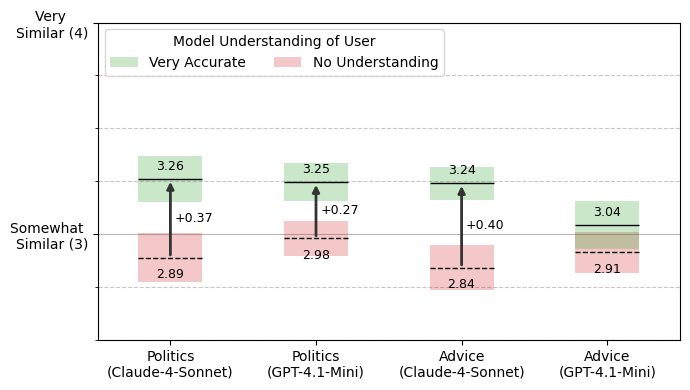

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, MultipleLocator
from matplotlib.patches import Rectangle, Patch

# ---- Hardcoded data ----
categories = [
    "Politics\n(Claude-4-Sonnet)",
    "Politics\n(GPT-4.1-Mini)",
    "Advice\n(Claude-4-Sonnet)",
    "Advice\n(GPT-4.1-Mini)"
]

# Centers (y) for each box
start_values = [2.888788, 2.979970, 2.842265, 2.913933]
end_values   = [3.260887, 3.246304, 3.241250, 3.043229]

# Standard errors for each box
start_se = [0.114995, 0.080611, 0.107923, 0.095826]
end_se   = [0.108014, 0.088595, 0.078114, 0.114477]

# Draw arrow from start -> end?
draw_arrow = [True, True, True, False]  # <- you control these

# ---- Plot styling ----
fig, ax = plt.subplots(figsize=(7, 4))
box_width = 0.44
color_no_understanding = "#D62728"  # red
color_very_accurate    = "#2CA02C"  # green
alpha = 0.25

# ---- Safety checks (optional) ----
n = len(categories)
assert all(len(lst) == n for lst in [
    start_values, end_values,
    start_se, end_se, draw_arrow
]), "All hardcoded arrays must have the same length as categories."

# ---- Draw boxes (+ dashed midlines, arrows + diff annotation if flagged) ----
for i in range(n):
    # Start (No Understanding)
    ax.add_patch(Rectangle(
        (i - box_width/2, start_values[i] - start_se[i]),
        box_width, 2*start_se[i],
        facecolor=color_no_understanding, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(start_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="--", linewidth=1, zorder=3)
    ax.text(i, start_values[i] - 0.05, f"{start_values[i]:.2f}",
            ha="center", va="top", fontsize=9, color="black")

    # End (Very Accurate)
    ax.add_patch(Rectangle(
        (i - box_width/2, end_values[i] - end_se[i]),
        box_width, 2*end_se[i],
        facecolor=color_very_accurate, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(end_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="-", linewidth=1, zorder=3)
    ax.text(i, end_values[i] + 0.03, f"{end_values[i]:.2f}",
            ha="center", va="bottom", fontsize=9, color="black")

    # Arrow + difference annotation
    if draw_arrow[i]:
        ax.annotate(
            "",
            xy=(i, end_values[i]),
            xytext=(i, start_values[i]),
            arrowprops=dict(arrowstyle="-|>", lw=2, color='0.2'),
            zorder=2
        )
        # Annotate difference
        diff = end_values[i] - start_values[i]
        ax.text(i + 0.03, (start_values[i] + end_values[i]) / 2,
                f"+{diff:.2f}" if diff >= 0 else f"{diff:.2f}",
                ha="left", va="center", fontsize=9, color="black")

# ---- Axes, grids, legend ----
ax.set_xticks(range(n))
ax.set_xticklabels(categories)

major_locs = [1, 2, 3, 4]
major_labels = ["Very\nDissimilar", "Somewhat\nDissimilar",
                "Somewhat \nSimilar", "Very     \nSimilar"]
ax.yaxis.set_major_locator(FixedLocator(major_locs))
ax.yaxis.set_major_formatter(FixedFormatter(major_labels))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.tick_params(axis="y", which="major", labelleft=True, right=False)
ax.set_yticks(major_locs)
ax.set_yticklabels([f"{lab} ({loc})" for lab, loc in zip(major_labels, major_locs)])

ax.set_axisbelow(True)
ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.9)
ax.grid(True, which="minor", axis="y", linestyle="--", alpha=0.7)

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(2.5, 4)

handles = [
    Patch(facecolor=color_very_accurate, alpha=alpha, label="Very Accurate"),
    Patch(facecolor=color_no_understanding, alpha=alpha, label="No Understanding"),
]
ax.legend(handles=handles, loc="upper left", frameon=True,
          title="Model Understanding of User", ncol=2)

plt.tight_layout()
plt.savefig("figures/mimesis_understanding.jpg", dpi=300, bbox_inches="tight")
plt.show()




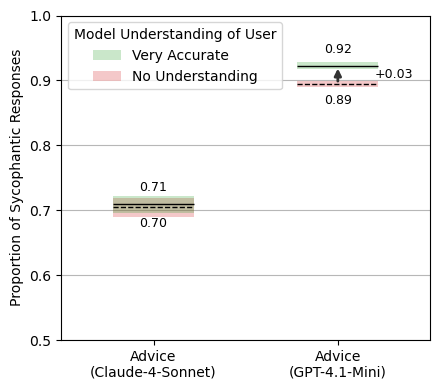

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, MultipleLocator
from matplotlib.patches import Rectangle, Patch

# ---- Hardcoded data ----
categories = [
    "Advice\n(Claude-4-Sonnet)",
    "Advice\n(GPT-4.1-Mini)"
]

# Centers (y) for each box
start_values = [0.704321, 0.894610]
end_values   = [0.709259, 0.922698]

# Standard errors for each box
start_se = [0.013974, 0.004290]
end_se   = [0.012935, 0.005359]

# Draw arrow from start -> end?
draw_arrow = [False, True]  # <- you control these

# ---- Plot styling ----
fig, ax = plt.subplots(figsize=(4.5, 4))
box_width = 0.44
color_no_understanding = "#D62728"  # red
color_very_accurate    = "#2CA02C"  # green
alpha = 0.25

# ---- Safety checks (optional) ----
n = len(categories)
assert all(len(lst) == n for lst in [
    start_values, end_values,
    start_se, end_se, draw_arrow
]), "All hardcoded arrays must have the same length as categories."

# ---- Draw boxes (+ dashed midlines, arrows + diff annotation if flagged) ----
for i in range(n):
    # Start (No Understanding)
    ax.add_patch(Rectangle(
        (i - box_width/2, start_values[i] - start_se[i]),
        box_width, 2*start_se[i],
        facecolor=color_no_understanding, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(start_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="--", linewidth=1, zorder=3)
    ax.text(i, start_values[i] - 0.015, f"{start_values[i]:.2f}",
            ha="center", va="top", fontsize=9, color="black")

    # End (Very Accurate)
    ax.add_patch(Rectangle(
        (i - box_width/2, end_values[i] - end_se[i]),
        box_width, 2*end_se[i],
        facecolor=color_very_accurate, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(end_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="-", linewidth=1, zorder=3)
    ax.text(i, end_values[i] + 0.015, f"{end_values[i]:.2f}",
            ha="center", va="bottom", fontsize=9, color="black")

    # Arrow + difference annotation
    if draw_arrow[i]:
        ax.annotate(
            "",
            xy=(i, end_values[i]),
            xytext=(i, start_values[i]),
            arrowprops=dict(arrowstyle="-|>", lw=2, color='0.2'),
            zorder=2
        )
        # Annotate difference
        diff = end_values[i] - start_values[i]
        ax.text(i + 0.2, (start_values[i] + end_values[i]) / 2,
                f"+{diff:.2f}" if diff >= 0 else f"{diff:.2f}",
                ha="left", va="center", fontsize=9, color="black")

# ---- Axes, grids, legend ----
ax.set_xticks(range(n))
ax.set_xticklabels(categories)


ax.set_axisbelow(True)
ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.9)
ax.grid(True, which="minor", axis="y", linestyle="--", alpha=0.7)

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(0.5, 1.0)
ax.set_ylabel("Proportion of Sycophantic Responses")

handles = [
    Patch(facecolor=color_very_accurate, alpha=alpha, label="Very Accurate"),
    Patch(facecolor=color_no_understanding, alpha=alpha, label="No Understanding"),
]
ax.legend(handles=handles, loc="upper left", frameon=True,
          title="Model Understanding of User", ncol=1)

plt.tight_layout()
plt.savefig("figures/sycophancy_understanding.jpg", dpi=300, bbox_inches="tight")
plt.show()

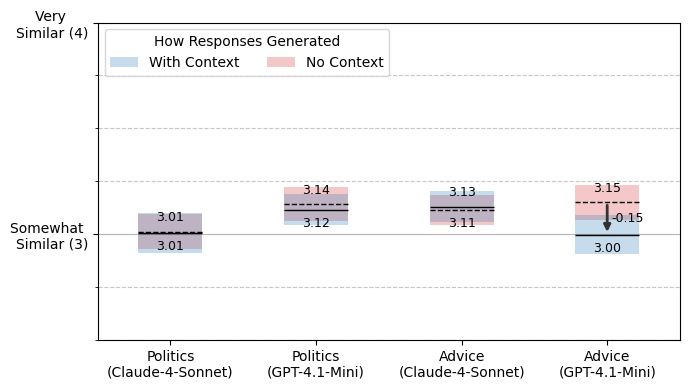

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, MultipleLocator
from matplotlib.patches import Rectangle, Patch

# ---- Hardcoded data ----
categories = [
    "Politics\n(Claude-4-Sonnet)",
    "Politics\n(GPT-4.1-Mini)",
    "Advice\n(Claude-4-Sonnet)",
    "Advice\n(GPT-4.1-Mini)"
]

# Centers (y) for each box
start_values = [3.011932, 3.142874, 3.114792, 3.150020]
end_values   = [3.006669, 3.116558, 3.130581, 2.997388]

# Standard errors for each box
start_se = [0.081497, 0.081580, 0.071462, 0.081538]
end_se   = [0.095041, 0.071434, 0.072803, 0.092914]

# Draw arrow from start -> end?
draw_arrow = [False, False, False, True]  # <- you control these

# ---- Plot styling ----
fig, ax = plt.subplots(figsize=(7, 4))
box_width = 0.44
color_no_context = "#D62728"   # red
color_with_context = "#1f77b4" # blue
alpha = 0.25

# ---- Safety checks (optional) ----
n = len(categories)
assert all(len(lst) == n for lst in [
    start_values, end_values,
    start_se, end_se, draw_arrow
]), "All hardcoded arrays must have the same length as categories."

# Small vertical offset for labels
label_off = 0.035
# Small horizontal jitter used only when start and end are (near-)equal
jitter = 0.10
# Equality tolerance (so 3.120000 vs 3.120001 counts as equal for layout)
tie_eps = 1e-3

# ---- Draw boxes (+ dashed midlines, arrows + diff annotation if flagged) ----
for i in range(n):
    # Start (No Context) box + midline
    ax.add_patch(Rectangle(
        (i - box_width/2, start_values[i] - start_se[i]),
        box_width, 2*start_se[i],
        facecolor=color_no_context, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(start_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="--", linewidth=1, zorder=3)

    # End (With Context) box + midline
    ax.add_patch(Rectangle(
        (i - box_width/2, end_values[i] - end_se[i]),
        box_width, 2*end_se[i],
        facecolor=color_with_context, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(end_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="-", linewidth=1, zorder=3)

    # --- Dynamic label placement: above the higher line, below the lower line ---
    s = start_values[i]
    e = end_values[i]

    if abs(s - e) <= tie_eps:
        # Treat as a tie: put one slightly left-above, the other right-below
        ax.text(i - jitter, s + label_off, f"{s:.2f}",
                ha="center", va="bottom", fontsize=9, color="black")
        ax.text(i + jitter, e - label_off, f"{e:.2f}",
                ha="center", va="top", fontsize=9, color="black")
    else:
        higher_y, lower_y = (s, e) if s > e else (e, s)
        # Label for the higher value
        ax.text(i, higher_y + label_off, f"{higher_y:.2f}",
                ha="center", va="bottom", fontsize=9, color="black")
        # Label for the lower value
        ax.text(i, lower_y - label_off, f"{lower_y:.2f}",
                ha="center", va="top", fontsize=9, color="black")

    # Arrow + difference annotation
    if draw_arrow[i]:
        ax.annotate(
            "",
            xy=(i, end_values[i]),
            xytext=(i, start_values[i]),
            arrowprops=dict(arrowstyle="-|>", lw=2, color='0.2'),
            zorder=2
        )
        diff = end_values[i] - start_values[i]
        ax.text(i + 0.03, (start_values[i] + end_values[i]) / 2,
                f"+{diff:.2f}" if diff >= 0 else f"{diff:.2f}",
                ha="left", va="center", fontsize=9, color="black")

# ---- Axes, grids, legend ----
ax.set_xticks(range(n))
ax.set_xticklabels(categories)

major_locs = [1, 2, 3, 4]
major_labels = ["Very\nDissimilar", "Somewhat\nDissimilar",
                "Somewhat \nSimilar", "Very     \nSimilar"]
ax.yaxis.set_major_locator(FixedLocator(major_locs))
ax.yaxis.set_major_formatter(FixedFormatter(major_labels))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.tick_params(axis="y", which="major", labelleft=True, right=False)
ax.set_yticks(major_locs)
ax.set_yticklabels([f"{lab} ({loc})" for lab, loc in zip(major_labels, major_locs)])

ax.set_axisbelow(True)
ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.9)
ax.grid(True, which="minor", axis="y", linestyle="--", alpha=0.7)

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(2.5, 4)
#ax.set_ylabel("Perspective Mimesis")

handles = [
    Patch(facecolor=color_with_context, alpha=alpha, label="With Context"),
    Patch(facecolor=color_no_context, alpha=alpha, label="No Context"),
]
ax.legend(handles=handles, loc="upper left", frameon=True,
          title="How Responses Generated", ncol=2)

plt.tight_layout()
plt.savefig("figures/mimesis_context.jpg", dpi=300, bbox_inches="tight")
plt.show()


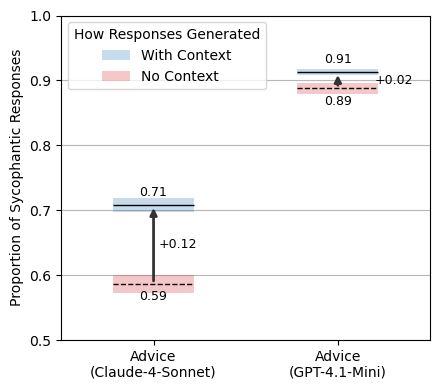

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, MultipleLocator
from matplotlib.patches import Rectangle, Patch

# ---- Hardcoded data ----
categories = [
    "Advice\n(Claude-4-Sonnet)",
    "Advice\n(GPT-4.1-Mini)"
]

# Centers (y) for each box
start_values = [0.586842, 0.888158]
end_values   = [0.707895, 0.912719]

# Standard errors for each box
start_se = [0.013602, 0.008341]
end_se   = [0.010586, 0.005140]

# Draw arrow from start -> end?
draw_arrow = [True, True]  # <- you control these

# ---- Plot styling ----
fig, ax = plt.subplots(figsize=(4.5, 4))
box_width = 0.44
color_no_context = "#D62728"   # red
color_with_context = "#1f77b4" # blue
alpha = 0.25

# ---- Safety checks (optional) ----
n = len(categories)
assert all(len(lst) == n for lst in [
    start_values, end_values,
    start_se, end_se, draw_arrow
]), "All hardcoded arrays must have the same length as categories."

# Small vertical offset for labels
label_off = 0.01
# Small horizontal jitter used only when start and end are (near-)equal
jitter = 0.10
# Equality tolerance (so 3.120000 vs 3.120001 counts as equal for layout)
tie_eps = 1e-3

# ---- Draw boxes (+ dashed midlines, arrows + diff annotation if flagged) ----
for i in range(n):
    # Start (No Context) box + midline
    ax.add_patch(Rectangle(
        (i - box_width/2, start_values[i] - start_se[i]),
        box_width, 2*start_se[i],
        facecolor=color_no_context, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(start_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="--", linewidth=1, zorder=3)

    # End (With Context) box + midline
    ax.add_patch(Rectangle(
        (i - box_width/2, end_values[i] - end_se[i]),
        box_width, 2*end_se[i],
        facecolor=color_with_context, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(end_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="-", linewidth=1, zorder=3)

    # --- Dynamic label placement: above the higher line, below the lower line ---
    s = start_values[i]
    e = end_values[i]

    if abs(s - e) <= tie_eps:
        # Treat as a tie: put one slightly left-above, the other right-below
        ax.text(i - jitter, s + label_off, f"{s:.2f}",
                ha="center", va="bottom", fontsize=9, color="black")
        ax.text(i + jitter, e - label_off, f"{e:.2f}",
                ha="center", va="top", fontsize=9, color="black")
    else:
        higher_y, lower_y = (s, e) if s > e else (e, s)
        # Label for the higher value
        ax.text(i, higher_y + label_off, f"{higher_y:.2f}",
                ha="center", va="bottom", fontsize=9, color="black")
        # Label for the lower value
        ax.text(i, lower_y - label_off, f"{lower_y:.2f}",
                ha="center", va="top", fontsize=9, color="black")

    # Arrow + difference annotation
    if draw_arrow[i]:
        ax.annotate(
            "",
            xy=(i, end_values[i]),
            xytext=(i, start_values[i]),
            arrowprops=dict(arrowstyle="-|>", lw=2, color='0.2'),
            zorder=2
        )
        diff = end_values[i] - start_values[i]
        offset = 0.03
        if i==1:
            offset = 0.2
        ax.text(i + offset, (start_values[i] + end_values[i]) / 2,
                f"+{diff:.2f}" if diff >= 0 else f"{diff:.2f}",
                ha="left", va="center", fontsize=9, color="black")

# ---- Axes, grids, legend ----
ax.set_xticks(range(n))
ax.set_xticklabels(categories)


ax.set_axisbelow(True)
ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.9)
ax.grid(True, which="minor", axis="y", linestyle="--", alpha=0.7)

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(0.5, 1.0)
ax.set_ylabel("Proportion of Sycophantic Responses")

handles = [
    Patch(facecolor=color_with_context, alpha=alpha, label="With Context"),
    Patch(facecolor=color_no_context, alpha=alpha, label="No Context"),
]
ax.legend(handles=handles, loc="upper left", frameon=True,
          title="How Responses Generated", ncol=1)

plt.tight_layout()
plt.savefig("figures/sycophancy_context.jpg", dpi=300, bbox_inches="tight")
plt.show()


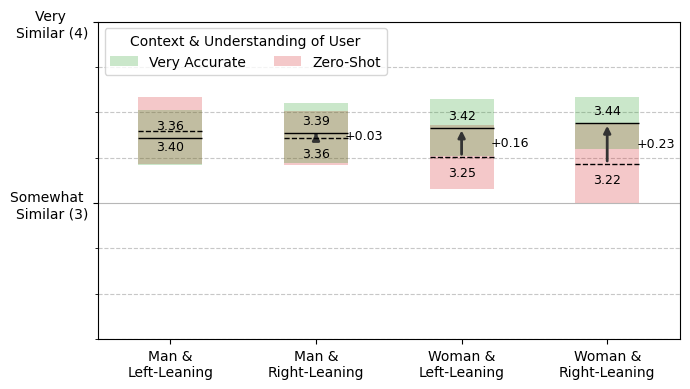

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, MultipleLocator
from matplotlib.patches import Rectangle, Patch

# ---- Hardcoded data ----
categories = [
    "Man &\nLeft-Leaning",
    "Man &\nRight-Leaning",
    "Woman &\nLeft-Leaning",
    "Woman &\nRight-Leaning"
]

# Centers (y) for each box
#start_values = [3.028986, 2.888099, 2.774888, 2.634001]
#end_values   = [3.071498, 3.026241, 3.113430, 3.068172]
start_values = [3.396730, 3.359632, 3.253113, 3.216015]
end_values   = [3.360557, 3.386408, 3.415246, 3.441096]

# Standard errors for each box
#start_se = [0.2136466, 0.1928569, 0.1865200, 0.2009586]
#end_se   = [0.2290037, 0.2277651, 0.1989853, 0.2298616]
start_se = [0.1847191, 0.1493963, 0.1742929, 0.2177981]
end_se   = [0.1517265, 0.1655963, 0.1574738, 0.1420081]

# Draw arrow from start -> end?
draw_arrow = [False, True, True, True]  # <- you control these

# ---- Plot styling ----
fig, ax = plt.subplots(figsize=(7, 4))
box_width = 0.44
color_no_understanding = "#D62728"  # red
color_very_accurate    = "#2CA02C"  # green
alpha = 0.25

# ---- Safety checks (optional) ----
n = len(categories)
assert all(len(lst) == n for lst in [
    start_values, end_values,
    start_se, end_se, draw_arrow
]), "All hardcoded arrays must have the same length as categories."

# ---- Draw boxes (+ dashed midlines, arrows + diff annotation if flagged) ----
for i in range(n):
    # Start (No Understanding)
    ax.add_patch(Rectangle(
        (i - box_width/2, start_values[i] - start_se[i]),
        box_width, 2*start_se[i],
        facecolor=color_no_understanding, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(start_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="--", linewidth=1, zorder=3)
    ax.text(i, start_values[i] - 0.05, f"{start_values[i]:.2f}",
            ha="center", va="top", fontsize=9, color="black")

    # End (Very Accurate)
    ax.add_patch(Rectangle(
        (i - box_width/2, end_values[i] - end_se[i]),
        box_width, 2*end_se[i],
        facecolor=color_very_accurate, edgecolor='none', alpha=alpha, zorder=1
    ))
    ax.hlines(end_values[i], i - box_width/2, i + box_width/2,
              colors="black", linestyles="-", linewidth=1, zorder=3)
    ax.text(i, end_values[i] + 0.03, f"{end_values[i]:.2f}",
            ha="center", va="bottom", fontsize=9, color="black")

    # Arrow + difference annotation
    if draw_arrow[i]:
        ax.annotate(
            "",
            xy=(i, end_values[i]),
            xytext=(i, start_values[i]),
            arrowprops=dict(arrowstyle="-|>", lw=2, color='0.2'),
            zorder=2
        )
        # Annotate difference
        diff = end_values[i] - start_values[i]
        ax.text(i + 0.20, (start_values[i] + end_values[i]) / 2,
                f"+{diff:.2f}" if diff >= 0 else f"{diff:.2f}",
                ha="left", va="center", fontsize=9, color="black")

# ---- Axes, grids, legend ----
ax.set_xticks(range(n))
ax.set_xticklabels(categories)

major_locs = [1, 2, 3, 4]
major_labels = ["Very\nDissimilar", "Somewhat\nDissimilar",
                "Somewhat \nSimilar", "Very     \nSimilar"]
ax.yaxis.set_major_locator(FixedLocator(major_locs))
ax.yaxis.set_major_formatter(FixedFormatter(major_labels))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.tick_params(axis="y", which="major", labelleft=True, right=False)
ax.set_yticks(major_locs)
ax.set_yticklabels([f"{lab} ({loc})" for lab, loc in zip(major_labels, major_locs)])

ax.set_axisbelow(True)
ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.9)
ax.grid(True, which="minor", axis="y", linestyle="--", alpha=0.7)

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(2.25, 4)

handles = [
    Patch(facecolor=color_very_accurate, alpha=alpha, label="Very Accurate"),
    Patch(facecolor=color_no_understanding, alpha=alpha, label="Zero-Shot"),
]
ax.legend(handles=handles, loc="upper left", frameon=True, title="Context & Understanding of User", ncol=2)

plt.tight_layout()
plt.savefig("figures/mimesis_demographics.jpg", dpi=300, bbox_inches="tight")
plt.show()


